<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning%20Interview%20Prep%20Questions/Support%20Vector%20Machine/svm_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM) from Scratch (No Libraries)

In this notebook, we'll:

- Understand how linear SVMs work  
- Use the hinge loss for classification  
- Train with gradient descent using NumPy only  
- Visualize the separating hyperplane and margin  


## What is an SVM?

A Support Vector Machine tries to find the **best hyperplane** that separates two classes **with the maximum margin**.

The decision function is:

$$[
f(x) = w \cdot x + b
]
$$

The hinge loss is:

$$[
\text{Loss} = \frac{1}{n} \sum_{i=1}^{n} \max(0, 1 - y_i(w \cdot x_i + b)) + \lambda ||w||^2
]$$

Where:
- $$( y_i \in \{-1, 1\} )$$
- $$( \lambda )$$ is the regularization strength


##  Imports + Dataset



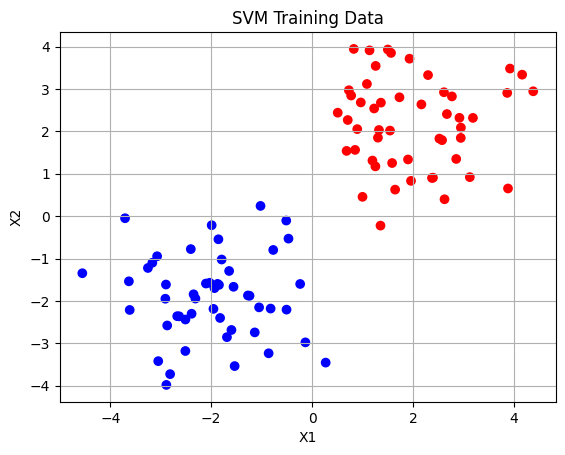

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate simple binary classification data
np.random.seed(0)
X_class0 = np.random.randn(50, 2) - 2
X_class1 = np.random.randn(50, 2) + 2

X = np.vstack([X_class0, X_class1])
y = np.array([0]*50 + [1]*50)

# Convert labels to {-1, 1} for SVM
y = np.where(y == 0, -1, 1)

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title("SVM Training Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

## Initialize Parameters

In [2]:
n_samples, n_features = X.shape

# Initialize weights and bias
w = np.zeros(n_features)
b = 0

# Hyperparameters
lr = 0.001
epochs = 1000
lambda_reg = 0.01

## Training Loop (Gradient Descent)

In [3]:
for epoch in range(epochs):
    for i in range(n_samples):
        condition = y[i] * (np.dot(X[i], w) + b) >= 1
        if condition:
            dw = 2 * lambda_reg * w
            db = 0
        else:
            dw = 2 * lambda_reg * w - y[i] * X[i]
            db = -y[i]

        # Update
        w -= lr * dw
        b -= lr * db

    if epoch % 200 == 0:
        margin_violations = np.sum(y * (np.dot(X, w) + b) < 1)
        print(f"Epoch {epoch} | Margin violations: {margin_violations}")

Epoch 0 | Margin violations: 82
Epoch 200 | Margin violations: 3
Epoch 400 | Margin violations: 3
Epoch 600 | Margin violations: 2
Epoch 800 | Margin violations: 2


## Visualize Decision Boundary

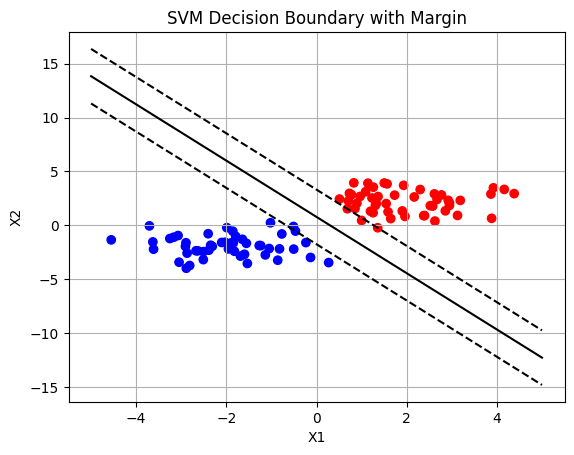

In [4]:
# Decision boundary plot
def plot_svm_boundary(X, y, w, b):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

    x0 = np.linspace(-5, 5, 100)
    x1 = -(w[0] * x0 + b) / w[1]
    x1_margin_pos = -(w[0] * x0 + b - 1) / w[1]
    x1_margin_neg = -(w[0] * x0 + b + 1) / w[1]

    plt.plot(x0, x1, 'k-')              # decision boundary
    plt.plot(x0, x1_margin_pos, 'k--')  # positive margin
    plt.plot(x0, x1_margin_neg, 'k--')  # negative margin
    plt.title("SVM Decision Boundary with Margin")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.show()

plot_svm_boundary(X, y, w, b)

## Prediction Function + Accuracy

In [5]:
def predict(X, w, b):
    return np.sign(np.dot(X, w) + b)

y_pred = predict(X, w, b)
accuracy = np.mean(y_pred == y)
print(f"Training Accuracy: {accuracy * 100:.2f}%")


Training Accuracy: 100.00%


## Summary

- Implemented a linear SVM classifier from scratch using NumPy  
- Trained using hinge loss and gradient descent  
- Visualized the decision boundary and margin  
- Achieved good accuracy on simple binary data  

This builds a solid foundation for understanding how SVMs work under the hood.
